# Init

In [1]:
import numpy as np
import pandas as pd 
from io import StringIO
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving melb_data.csv to melb_data (7).csv
User uploaded file "melb_data.csv" with length 2091239 bytes


In [3]:
data = pd.read_csv(StringIO(uploaded["melb_data.csv"].decode('utf-8')))

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

def norm(data):
    data = np.array(data)
    normalized = (data - min(data)) / (max(data) - min(data))
    return normalized

def encode_by_frequency(data):
    n = len(data)
    frequency_map = {val:0 for val in set(data)}
    for val in data:
        frequency_map[val] += 1
    for k in frequency_map.keys():
        frequency_map[k] /= n 
    encoded_data = [*data]
    for i in range(n):
        encoded_data[i] = frequency_map[encoded_data[i]]/n
    return norm(encoded_data)

In [8]:
print("Total values:", len(data["Suburb"]))
print("Total unique values:", len(set(data["Suburb"])))
data["SuburbCode"] = encoder.fit_transform(data["Suburb"])
data["SuburbFrequency"] = encode_by_frequency(data["Suburb"])
data = data.drop("Suburb", axis=1)
print("Total unique frequencies:", len(set(data["SuburbFrequency"])))

Total values: 13580
Total unique values: 314
Total unique frequencies: 116


In [9]:
# Cleaning Addresses
def clean_address(address):
    # Remove the house number and End Suffix
    address = address.split(' ')
    return address[-2].strip()

cleaned_addresses = list(map(clean_address, data["Address"]))
print("Total addresses:", len(data["Address"]))
print("Unique values in cleaned addresses:", len(set(cleaned_addresses)))

frequency_encoded_cleaned_addresses = encode_by_frequency(cleaned_addresses)
data = data.drop("Address", axis=1)

data["AddressFrequency"] = frequency_encoded_cleaned_addresses
data["AddressCode"] = encoder.fit_transform(cleaned_addresses)
print("Total unique address frequencies:", len(set(data["AddressFrequency"])))

Total addresses: 13580
Unique values in cleaned addresses: 4124
Total unique address frequencies: 48


In [10]:
print(set(data["Rooms"]))
data["Rooms"] = norm(data["Rooms"])

{1, 2, 3, 4, 5, 6, 7, 8, 10}


In [11]:
print(set(data["Type"]))
data["Type"] = encoder.fit_transform(data["Type"])

{'t', 'u', 'h'}


In [12]:
print(data["Method"].head())
data["Method"] = encoder.fit_transform(data["Method"])

0     S
1     S
2    SP
3    PI
4    VB
Name: Method, dtype: object


In [13]:
print(data["SellerG"])
seller_frequencies = encode_by_frequency(data["SellerG"])
seller_codes = encoder.fit_transform(data["SellerG"])
print("Unique frequencies:", len(set(seller_frequencies)))
print("Unique Sellers:", len(set(seller_codes)))
data["SellerFreq"] = seller_frequencies
data["SellerCode"] = seller_codes
data = data.drop("SellerG", axis=1)

0          Biggin
1          Biggin
2          Biggin
3          Biggin
4          Nelson
           ...   
13575       Barry
13576    Williams
13577       Raine
13578     Sweeney
13579     Village
Name: SellerG, Length: 13580, dtype: object
Unique frequencies: 74
Unique Sellers: 268


In [14]:
print(data["Date"])

def seperate_date(dates):
    ds, ms, ys = [], [], []
    for date in dates:
        d, m, y = tuple(map(int, date.split('/')))
        ds.append(d)
        ms.append(m)
        ys.append(y)
    return ds, ms, ys

ds, ms, ys = seperate_date(data["Date"])
data["DaySold"] = ds
data["MonthSold"] = ms
data["YearSold"] = encoder.fit_transform(ys)

data = data.drop("Date", axis=1)

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, Length: 13580, dtype: object


In [15]:
print(data["Distance"])
data["Distance"] = norm(data["Distance"])
print(data["Distance"])

0         2.5
1         2.5
2         2.5
3         2.5
4         2.5
         ... 
13575    16.7
13576     6.8
13577     6.8
13578     6.8
13579     6.3
Name: Distance, Length: 13580, dtype: float64
0        0.051975
1        0.051975
2        0.051975
3        0.051975
4        0.051975
           ...   
13575    0.347193
13576    0.141372
13577    0.141372
13578    0.141372
13579    0.130977
Name: Distance, Length: 13580, dtype: float64


In [16]:
print(data["Postcode"].head())
data["Postcode"] = encoder.fit_transform(data["Postcode"])
print(data["Postcode"].head())

0    3067.0
1    3067.0
2    3067.0
3    3067.0
4    3067.0
Name: Postcode, dtype: float64
0    53
1    53
2    53
3    53
4    53
Name: Postcode, dtype: int64


In [17]:
# No need to change these
print(data["Bedroom2"].head())
print(data["Bathroom"].head())

0    2.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: Bedroom2, dtype: float64
0    1.0
1    1.0
2    2.0
3    2.0
4    1.0
Name: Bathroom, dtype: float64


In [18]:
print(set(data["Car"]))
data["Car"] = norm(data["Car"].replace(np.nan, 0))
print(set(data["Car"]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
{0.1, 0.0, 0.6, 0.2, 0.5, 0.4, 0.3, 0.8, 0.7, 0.9, 1.0}


In [19]:
print(data["Landsize"])
data["Landsize"] = norm(data["Landsize"])

0        202.0
1        156.0
2        134.0
3         94.0
4        120.0
         ...  
13575    652.0
13576    333.0
13577    436.0
13578    866.0
13579    362.0
Name: Landsize, Length: 13580, dtype: float64


In [20]:
print(data["BuildingArea"].head())
mean_area = sum(data["BuildingArea"].replace(np.nan, 0)) / sum(False == data["BuildingArea"].isna())
data["BuildingArea"] = data["BuildingArea"].replace(np.nan, mean_area)
data["BuildingArea"] = norm(data["BuildingArea"])
print(data["BuildingArea"].head())

0      NaN
1     79.0
2    150.0
3      NaN
4    142.0
Name: BuildingArea, dtype: float64
0    0.003414
1    0.001775
2    0.003370
3    0.003414
4    0.003190
Name: BuildingArea, dtype: float64


In [21]:
print(data["YearBuilt"].head())
data["YearBuilt"] = data["YearBuilt"].replace(np.nan, 0)
data["YearBuilt"] = encoder.fit_transform(data["YearBuilt"])
print(data["YearBuilt"].head())

0       NaN
1    1900.0
2    1900.0
3       NaN
4    2014.0
Name: YearBuilt, dtype: float64
0      0
1     30
2     30
3      0
4    140
Name: YearBuilt, dtype: int64


In [22]:
print(data["CouncilArea"].head())
data["CouncilArea"] = data["CouncilArea"].replace(np.nan, "Unknown")
council_codes = encoder.fit_transform(data["CouncilArea"])
council_frequencies = encode_by_frequency(data["CouncilArea"])
data["CouncilCode"] = council_codes
data["CouncilFreq"] = council_frequencies
data = data.drop("CouncilArea", axis=1)
print(data["CouncilCode"].head())

0    Yarra
1    Yarra
2    Yarra
3    Yarra
4    Yarra
Name: CouncilArea, dtype: object
0    32
1    32
2    32
3    32
4    32
Name: CouncilCode, dtype: int64


In [23]:
print(data["Lattitude"].head())
print(data["Longtitude"].head())

0   -37.7996
1   -37.8079
2   -37.8093
3   -37.7969
4   -37.8072
Name: Lattitude, dtype: float64
0    144.9984
1    144.9934
2    144.9944
3    144.9969
4    144.9941
Name: Longtitude, dtype: float64


In [24]:
print(data["Regionname"].head())
print(set(data["Regionname"]))
print("Unique regions:", len(set(data["Regionname"])))
region_frequencies = encode_by_frequency(data["Regionname"])
region_codes = encoder.fit_transform(data["Regionname"])
print("Unique region frequencies:", len(set(region_frequencies)) )
print(set(region_frequencies))
data["RegionCode"] = region_codes
data["RegionFreq"] = region_frequencies
data = data.drop("Regionname", axis=1)

0    Northern Metropolitan
1    Northern Metropolitan
2    Northern Metropolitan
3    Northern Metropolitan
4    Northern Metropolitan
Name: Regionname, dtype: object
{'South-Eastern Metropolitan', 'Eastern Victoria', 'Eastern Metropolitan', 'Western Metropolitan', 'Northern Metropolitan', 'Northern Victoria', 'Southern Metropolitan', 'Western Victoria'}
Unique regions: 8
Unique region frequencies: 8
{0.8273643577096289, 0.6253484880977912, 0.3085996139824148, 1.0, 0.08964186146257777, 0.004503538494531418, 0.0, 0.0019300879262277506}


In [25]:
print(data["Propertycount"].head())
data["PropertyCount"] = norm(data["Propertycount"])
print(data["Propertycount"].head())

0    4019.0
1    4019.0
2    4019.0
3    4019.0
4    4019.0
Name: Propertycount, dtype: float64
0    4019.0
1    4019.0
2    4019.0
3    4019.0
4    4019.0
Name: Propertycount, dtype: float64


In [26]:
data.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'SuburbCode', 'SuburbFrequency',
       'AddressFrequency', 'AddressCode', 'SellerFreq', 'SellerCode',
       'DaySold', 'MonthSold', 'YearSold', 'CouncilCode', 'CouncilFreq',
       'RegionCode', 'RegionFreq', 'PropertyCount'],
      dtype='object')

# Split into features and target

In [27]:
X, y = data.drop("Price", axis=1), data["Price"]

# Feature Selection and Model Construction

In [28]:
feature_overall_scores = {fe:0 for fe in data.columns}

In [29]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

# Estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
X.head()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,SuburbCode,SuburbFrequency,AddressFrequency,AddressCode,SellerFreq,SellerCode,DaySold,MonthSold,YearSold,CouncilCode,CouncilFreq,RegionCode,RegionFreq,PropertyCount
0,0.111111,0,1,0.051975,53,2.0,1.0,0.1,0.000466,0.003414,0,-37.7996,144.9984,4019.0,0,0.153631,0.048,3739,0.250639,23,3,12,0,32,0.472222,2,0.827364,0.17616
1,0.111111,0,1,0.051975,53,2.0,1.0,0.0,0.000360,0.001775,30,-37.8079,144.9934,4019.0,0,0.153631,0.000,421,0.250639,23,4,2,0,32,0.472222,2,0.827364,0.17616
2,0.222222,0,3,0.051975,53,3.0,2.0,0.0,0.000309,0.003370,30,-37.8093,144.9944,4019.0,0,0.153631,0.328,745,0.250639,23,4,3,1,32,0.472222,2,0.827364,0.17616
3,0.222222,0,0,0.051975,53,3.0,2.0,0.1,0.000217,0.003414,0,-37.7969,144.9969,4019.0,0,0.153631,0.016,1366,0.250639,23,4,3,1,32,0.472222,2,0.827364,0.17616
4,0.333333,0,4,0.051975,53,3.0,1.0,0.2,0.000277,0.003190,140,-37.8072,144.9941,4019.0,0,0.153631,0.488,2935,1.000000,155,4,6,0,32,0.472222,2,0.827364,0.17616


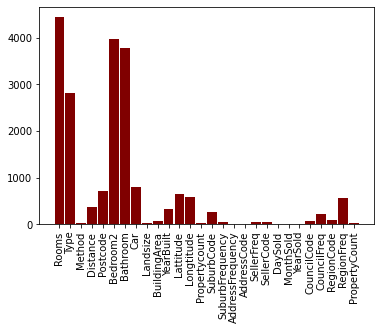

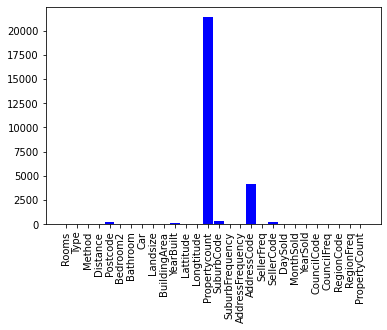

In [31]:
# sklearn feature selectors
freg_results = f_regression(X, y)[0]
variance_selector = VarianceThreshold()
variance_selector.fit_transform(X)
variance_results = variance_selector.variances_

plt.xticks(rotation=90)
plt.bar(X.columns, freg_results, color ='maroon', width=0.9)
plt.show()
print()

plt.xticks(rotation=90)
plt.bar(X.columns, variance_results, color ='blue', width=0.9)
plt.show()

In [32]:
# Add scores of top 10 features in f_reg and top 4 features from variance_selector

freg_results_map = {X.columns[i]:freg_results[i] for i in range(len(X.columns))}
sorted_results = sorted([*X.columns], key=lambda x: freg_results_map[x])[::-1]
print(sorted_results)

for i in range(10):
    feature_overall_scores[sorted_results[i]] += 1

variance_results_map = {X.columns[i]:variance_results[i] for i in range(len(X.columns))}
sorted_results = sorted([*X.columns], key=lambda x: variance_results_map[x])[::-1]
print(sorted_results)

for i in range(5):
    feature_overall_scores[sorted_results[i]] += 1

['Rooms', 'Bedroom2', 'Bathroom', 'Type', 'Car', 'Postcode', 'Lattitude', 'Longtitude', 'RegionFreq', 'Distance', 'YearBuilt', 'SuburbCode', 'CouncilFreq', 'RegionCode', 'CouncilCode', 'BuildingArea', 'SuburbFrequency', 'SellerFreq', 'SellerCode', 'Propertycount', 'PropertyCount', 'Method', 'Landsize', 'MonthSold', 'DaySold', 'AddressFrequency', 'AddressCode', 'YearSold']
['Propertycount', 'AddressCode', 'SuburbCode', 'SellerCode', 'Postcode', 'YearBuilt', 'CouncilCode', 'DaySold', 'MonthSold', 'RegionCode', 'Method', 'Bedroom2', 'Type', 'Bathroom', 'YearSold', 'SellerFreq', 'CouncilFreq', 'RegionFreq', 'SuburbFrequency', 'PropertyCount', 'AddressFrequency', 'Distance', 'Rooms', 'Longtitude', 'Car', 'Lattitude', 'Landsize', 'BuildingArea']


In [33]:
k_best_freg = SelectKBest(score_func=f_regression, k=14)
x_data_new = k_best_freg.fit_transform(X, y)

### Comparing two basic models

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data_new, y, random_state=42, test_size=0.2)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
error = r2_score(y_test, predictions)

print()
print("Error rate in model with limited features:\t", error)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
error = r2_score(y_test, predictions)

print("Error rate in model with all features:   \t", error)


Error rate in model with limited features:	 0.6094244036674188
Error rate in model with all features:   	 0.5945380754126708


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data_new, y, random_state=42, test_size=0.2)
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
error = r2_score(y_test, predictions)

print()
print("Error rate in model with limited features:\t", error)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
error = r2_score(y_test, predictions)

print("Error rate in model with all features:   \t", error)


Error rate in model with limited features:	 0.7516526290163844
Error rate in model with all features:   	 0.8152391740621279


## Using sklearn.feature_selection.SelectFromModel

In [36]:
rfm = RandomForestRegressor()
sfm = SelectFromModel(estimator=rfm)
sfm.fit_transform(X, y)

print("Most important features:")
for idx in sfm.get_support(indices=True):
    print( X.columns[idx] )
    feature_overall_scores[X.columns[idx]] += 1

Most important features:
Rooms
Type
Distance
Landsize
BuildingArea
Longtitude
RegionFreq


In [37]:
rfm = LinearRegression()
sfm = SelectFromModel(estimator=rfm)
sfm.fit_transform(X, y)

print("Most important features:")
for idx in sfm.get_support(indices=True):
    print( X.columns[idx] )
    feature_overall_scores[X.columns[idx]] += 1

Most important features:
Rooms
Distance
Car
Landsize
BuildingArea
Lattitude
Longtitude


In [38]:
sorted_features = sorted([*X.columns], key=lambda x:feature_overall_scores[x])[::-1]
top_features = sorted_features[:15]
print(top_features)

['Longtitude', 'Distance', 'Rooms', 'RegionFreq', 'Lattitude', 'BuildingArea', 'Landsize', 'Car', 'Postcode', 'Type', 'SellerCode', 'AddressCode', 'SuburbCode', 'Propertycount', 'Bathroom']


In [39]:
X_new = data[top_features]

In [40]:
X_new.head()

,Longtitude,Distance,Rooms,RegionFreq,Lattitude,BuildingArea,Landsize,Car,Postcode,Type,SellerCode,AddressCode,SuburbCode,Propertycount,Bathroom
0,144.9984,0.051975,0.111111,0.827364,-37.7996,0.003414,0.000466,0.1,53,0,23,3739,0,4019.0,1.0
1,144.9934,0.051975,0.111111,0.827364,-37.8079,0.001775,0.000360,0.0,53,0,23,421,0,4019.0,1.0
2,144.9944,0.051975,0.222222,0.827364,-37.8093,0.003370,0.000309,0.0,53,0,23,745,0,4019.0,2.0
3,144.9969,0.051975,0.222222,0.827364,-37.7969,0.003414,0.000217,0.1,53,0,23,1366,0,4019.0,2.0
4,144.9941,0.051975,0.333333,0.827364,-37.8072,0.003190,0.000277,0.2,53,0,155,2935,0,4019.0,1.0


# Comparing Models

In [41]:
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# LinearRegression and RandomForest are already imported.

In [42]:
x_train_part, x_test_part, y_train, y_test = train_test_split(X_new, y, random_state=42, test_size=0.2)
x_train_full, x_test_full, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### LinearRegression Model

In [43]:
regressor = LinearRegression()
regressor.fit(x_train_part, y_train)
predictions = regressor.predict(x_test_part)
error_part = r2_score(y_test, predictions)

regressor = LinearRegression()
regressor.fit(x_train_full, y_train)
predictions = regressor.predict(x_test_full)
error_full = r2_score(y_test, predictions)

print("Error rate in model with limited features: ", error_part)
print("Error rate in model with full features:    ", error_full)

Error rate in model with limited features:  0.5753493760451664
Error rate in model with full features:     0.5945380754126708


### RandomForestRegressor Model

In [44]:
rf_gs_results = {}

for e in (10, 100):
    for d in (None, 5, 50):
        model = RandomForestRegressor(n_estimators=e, max_depth=d)
        model.fit(x_train_full, y_train)
        predictions = model.predict(x_test_full)
        error = r2_score(predictions, y_test)
        rf_gs_results[f'{e}_{d}'] = error
        print(f"{e}, {d} gave\t", error)

# pprint(rf_gs_results)
# So the best model has 100(n_estimators) and None(default max_depth)

10, None gave	 0.742910179835149
10, 5 gave	 0.4749076871992276
10, 50 gave	 0.7290727551531044
100, None gave	 0.7595750461258948
100, 5 gave	 0.4656307780824712
100, 50 gave	 0.7581982376498815


In [45]:
# So it's better to leave the regressor with the default values as it performs better

regressor = RandomForestRegressor()
regressor.fit(x_train_part, y_train)
predictions = regressor.predict(x_test_part)
error_part = r2_score(y_test, predictions)

regressor = RandomForestRegressor()
regressor.fit(x_train_full, y_train)
predictions = regressor.predict(x_test_full)
error_full = r2_score(y_test, predictions)

print("Price average:\t", y.mean())
print("Max Price:\t", y.max())
print("Min Price:\t", y.min())
print("Error rate in model with limited features: ", error_part)
print("Error rate in model with full features:    ", error_full)

Price average:	 1075684.079455081
Max Price:	 9000000.0
Min Price:	 85000.0
Error rate in model with limited features:  0.8105345199754928
Error rate in model with full features:     0.8121828310167876


### SVR Model

In [46]:
svr_gs_results = {}

for k in ('linear', 'rbf'):
    for g in ('scale', 'auto'):
        for d in (3, 5):
            model = SVR(kernel=k, gamma=g, degree=d)
            model.fit(x_train_full, y_train)
            predictions = model.predict(x_test_full)
            error = r2_score(predictions, y_test)
            svr_gs_results[f'{k}_{g}_{d}'] = error
            print(f"{k}, {g}, {d} gave\t", error)      

# pprint(svr_gs_results)
# So, the best model has kernel set to 'linear' 
# Otherparameters do not change the score *much

linear, scale, 3 gave	 -11.985184244245827
linear, scale, 5 gave	 -11.985184244245827
linear, auto, 3 gave	 -11.985184244245827
linear, auto, 5 gave	 -11.985184244245827
rbf, scale, 3 gave	 -37928953.93208191
rbf, scale, 5 gave	 -37928953.93208191
rbf, auto, 3 gave	 -32438013496675.71
rbf, auto, 5 gave	 -32438013496675.71


In [47]:
# r2 score is already negative, so this model is not a good choice
# No point in executing this

# regressor = SVR(kernel='linear', gamma='auto', degree=3)
# regressor.fit(x_train_part, y_train)
# predictions = regressor.predict(x_test_part)
# error_part = r2_score(y_test, predictions)

# regressor = SVR(kernel='linear', gamma='auto', degree=3)
# regressor.fit(x_train_full, y_train)
# predictions = regressor.predict(x_test_full)
# error_full = r2_score(y_test, predictions)

# print("Price average:\t", y.mean())
# print("Max Price:\t", y.max())
# print("Min Price:\t", y.min())
# print("Error rate in model with limited features: ", error_part)
# print("Error rate in model with full features:    ", error_full)

In [48]:
# Hence, the best model is RandomForestRegressor with default parameters
# It gave a r2 score of ~0.806 for Partial features and ~0.812 for Full Features

# Best Model

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
print("Price average:\t", y.mean())
print("Max Price:\t", y.max())
print("Min Price:\t", y.min())

# Searching for a good random state
for r in (0, 42, 73, 5677):

    regressor = RandomForestRegressor(random_state=r)
    regressor.fit(x_train_part, y_train)
    predictions = regressor.predict(x_test_part)
    error_part = r2_score(y_test, predictions)
    error_part_mae = mean_absolute_error(y_test, predictions)

    regressor = RandomForestRegressor(random_state=r)
    regressor.fit(x_train_full, y_train)
    predictions = regressor.predict(x_test_full)
    error_full = r2_score(y_test, predictions)
    error_full_mae = mean_absolute_error(y_test, predictions)

    print("\nSeed:", r)
    print("Error rate in model with limited features: ", error_part, error_part_mae)
    print("Error rate in model with full features:    ", error_full, error_full_mae)

Price average:	 1075684.079455081
Max Price:	 9000000.0
Min Price:	 85000.0

Seed: 0
Error rate in model with limited features:  0.8116941643658091 167389.59846360193
Error rate in model with full features:     0.8108355704896341 166369.8157142857

Seed: 42
Error rate in model with limited features:  0.8086539345073062 168101.7034055684
Error rate in model with full features:     0.8146535080959711 166153.78933726068

Seed: 73
Error rate in model with limited features:  0.8100485713138398 167264.64754871192
Error rate in model with full features:     0.8111190479871897 166633.7036597938

Seed: 5677
Error rate in model with limited features:  0.8087845541851006 167819.96679938986
Error rate in model with full features:     0.8112673213958311 166540.934005891


In [51]:
# Hence, the best model is RandomForestRegressor
top_features, f"Max r2_score {0.81} for model with default parameters and random_state set to 42"

(['Longtitude',
  'Distance',
  'Rooms',
  'RegionFreq',
  'Lattitude',
  'BuildingArea',
  'Landsize',
  'Car',
  'Postcode',
  'Type',
  'SellerCode',
  'AddressCode',
  'SuburbCode',
  'Propertycount',
  'Bathroom'],
 'Max r2_score 0.81 for model with default parameters and random_state set to 42')